## Clustering

In [19]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from os import getcwd, listdir

data_dir = getcwd() + "/data/"
image_paths = [data_dir + filename for filename in listdir(data_dir)]

In [21]:
from skimage.io import imread

images = [imread(path) for path in image_paths]

In [48]:
images[0].shape

(251, 378)

In [49]:
import numpy as np

a = np.array([[[1,1,1],[2,2,2]]])

In [58]:
b = np.array([[1,2,3],
              [4,5,6]])

In [56]:
a.flatten()

array([1, 1, 1, 2, 2, 2])

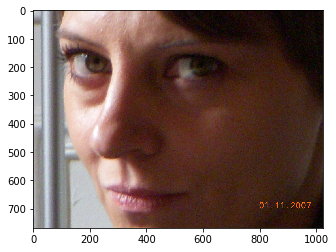

In [52]:
img = images[5]
plt.imshow(img)

In [54]:
img[:,:,1]

(768, 1024)

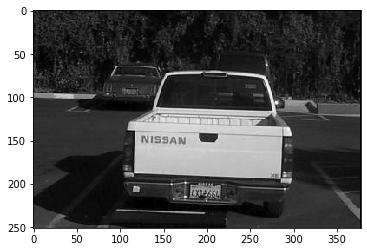

In [64]:
from skimage.color import gray2rgb
colors = gray2rgb(images[0])
plt.imshow(colors)

In [66]:
from skimage.color import gray2rgb

def vectorize(image):
    original_shape = image.shape

    if len(original_shape) == 2:
        image = gray2rgb(image)

    new_image = resize(image, [250,250])
    return new_image.flatten()

In [163]:
from app.image_io import load_images
from app.visual_similarity.cluster_similar import *

path = "data/"
names, images = load_images(path)
vectors = [vectorize(image) for image in images]

In [165]:
threshold = 0.8

not_grouped = set(names)
pairs = []

n = len(vectors)

for i in range(n):
    for j in range(i+1, n):
        if similarity(vectors[i], vectors[j]) >= threshold:
            i_name = names[i]
            j_name = names[j]

            pairs.append((i_name, j_name))

            if i_name in not_grouped:
                not_grouped.remove(i_name)
            if j_name in not_grouped:
                not_grouped.remove(j_name)

In [166]:
groups = group_pairs(pairs)

In [168]:
a = imread("data/Car1.jpg")

In [173]:
type(resize(a, [250,250]))

numpy.ndarray

New stuff

In [4]:
from app.image_io import load_images

In [5]:
names, images = load_images("data/")

In [12]:
import cv2

In [9]:
resized = [resize(image, (300,300)) for image in images]

In [11]:
for i in range(len(resized)):
    print(resized[i].shape)

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

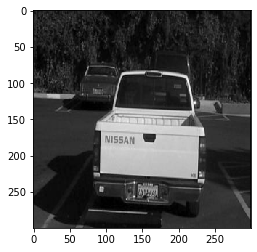

In [18]:
plt.imshow(resized[0])

In [20]:
from app.visual_similarity.cluster_similar import *

In [21]:
for i in range(len(images)):
    for j in range(i+1, len(images)):
        print(similarity(resized[i], resized[j]))

0.6132528976034859
0.7346660566448802
0.7397579956427016
0.7211156717501817
0.6990894698620189
0.5410951198257081
0.6201903267973856
0.5251893681917211
0.6041494553376907
0.7118296296296296
0.7090622512708787
0.7047708351488745
0.6773153812636166
0.6707366158315178
0.6958919535221497
0.750303602033406
0.4957081626724764
0.605930631808279
0.5650215105301379
0.6733780682643428
0.6012867102396514
0.7048601016702978
0.6504627741466957
0.681215003631082
0.6460531880900509
0.655570806100218
0.654920522875817
0.6694749164851126
0.6686601016702978
0.5866906899055919
0.6650374727668845
0.7562963253449528
0.6083420043572985
0.6788476833696443
0.6307658242556282
0.7242585330428468
0.7355174001452434
0.7117434713144517
0.685288249818446
0.7316418881626725
0.6579255047204067
0.6695877124183007
0.6322666957153231
0.6829091067538127
0.7319938126361656
0.7337165141612201
0.6440541757443718
0.7148965867828614
0.7337321132897604
0.7245113870733477
0.7667927814088599
0.6024515177923021
0.6970585911401599

In [22]:
import numpy as np

In [23]:
image1 = resized[0]
image2 = resized[1]

In [26]:
image1.astype('double') - image2.astype('double')

array([[[-223., -223., -223.],
        [-222., -222., -222.],
        [-209., -209., -209.],
        ...,
        [-202., -203., -148.],
        [-231., -221., -158.],
        [-249., -244., -182.]],

       [[-222., -222., -222.],
        [-223., -223., -223.],
        [-214., -214., -214.],
        ...,
        [-140., -182., -139.],
        [-226., -202., -146.],
        [-251., -246., -176.]],

       [[-223., -223., -223.],
        [-227., -227., -227.],
        [-226., -226., -226.],
        ...,
        [-125., -112.,  -93.],
        [-188., -150., -107.],
        [-250., -232., -178.]],

       ...,

       [[ -61.,  -57.,  -42.],
        [ -54.,  -51.,  -37.],
        [ -61.,  -59.,  -48.],
        ...,
        [ -57.,  -63.,  -57.],
        [ -58.,  -62.,  -61.],
        [-102., -102.,  -95.]],

       [[ -60.,  -58.,  -41.],
        [ -52.,  -50.,  -40.],
        [ -65.,  -64.,  -51.],
        ...,
        [ -76.,  -70.,  -69.],
        [ -72.,  -68.,  -63.],
        [-122.,

In [27]:
img1 = image1.astype('double')
img2 = image2.astype('double')

diff = abs(img1 - img2)
diff

array([[[223., 223., 223.],
        [222., 222., 222.],
        [209., 209., 209.],
        ...,
        [202., 203., 148.],
        [231., 221., 158.],
        [249., 244., 182.]],

       [[222., 222., 222.],
        [223., 223., 223.],
        [214., 214., 214.],
        ...,
        [140., 182., 139.],
        [226., 202., 146.],
        [251., 246., 176.]],

       [[223., 223., 223.],
        [227., 227., 227.],
        [226., 226., 226.],
        ...,
        [125., 112.,  93.],
        [188., 150., 107.],
        [250., 232., 178.]],

       ...,

       [[ 61.,  57.,  42.],
        [ 54.,  51.,  37.],
        [ 61.,  59.,  48.],
        ...,
        [ 57.,  63.,  57.],
        [ 58.,  62.,  61.],
        [102., 102.,  95.]],

       [[ 60.,  58.,  41.],
        [ 52.,  50.,  40.],
        [ 65.,  64.,  51.],
        ...,
        [ 76.,  70.,  69.],
        [ 72.,  68.,  63.],
        [122., 116., 112.]],

       [[ 68.,  60.,  52.],
        [ 58.,  54.,  36.],
        [ 65.,  

In [30]:
np.sum(diff / np.iinfo(image1.dtype).max)/image1.size

0.3867471023965141

In [31]:
def compare(u, v):
    """
    Find percent similarity [0,1] between 1D vectors u and v
    """

    ud = u.astype('double')
    vd = v.astype('double')

    datatype_info = np.iinfo(u.dtype)
    max_val = datatype_info.max

    percent_diffs = np.abs(ud - vd) / max_val
    return 1 - np.sum(percent_diffs)/u.size

In [1]:
from app.visual_similarity.group_similar import *

res = group_images("data/")

## SSIM

In [2]:
from app.visual_similarity.group_similar import *

In [7]:
from app.image_io import load_images

image_names, images = load_images("data/")

In [4]:
import matplotlib.pyplot as plt

In [26]:
from skimage.metrics import *

In [ ]:
from cv2 import resize

In [18]:
vectors = [resize(image, (300,300)) for image in images]

In [19]:
structural_similarity(vectors[0], vectors[0], multichannel=True)

1.0

In [22]:
n = len(vectors)
similarities = []

for i in range(n):
    for j in range(i+1, n):
        similarity = structural_similarity(vectors[i], vectors[j], multichannel=True)
        similarities.append(similarity)

In [25]:
print(max(similarities))
print(min(similarities))

0.4094627837639528
0.02435373568431497


In [27]:
n = len(vectors)
similarities = []

for i in range(n):
    for j in range(i+1, n):
#         similarity = structural_similarity(vectors[i], vectors[j], multichannel=True)
        similarity = mean_squared_error(vectors[i], vectors[j])
        similarities.append(similarity)

In [30]:
import numpy as np
similarities = np.sqrt(similarities)

print(min(similarities))
print(max(similarities))

63.76008138151784
144.90356493071394


In [31]:
import cv2

In [36]:
from skimage import data
from skimage.feature import Cascade

In [38]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)

In [39]:
img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))


In [41]:
img2 = images[0]
detected = detector.detect_multi_scale(img=img2, scale_factor=1.2, step_ratio=1, min_size=(60,60), max_size=(123,123))

In [44]:
face_detector = cv2.CascadeClassifier("app/cascades/data/lbpcascade_frontalface_improved.xml")

In [45]:
gray_astronaut = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [52]:
faces = face_detector.detectMultiScale(gray_astronaut)#, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))

In [53]:
faces

array([[189,  86,  72,  72]], dtype=int32)

In [56]:
cv2.imshow("asd", images[5])

In [3]:
a = ["", "adsf"]
[len(b) != 0 for b in a]

[False, True]

In [8]:
from app.image_io import load_images

In [6]:
import importlib
import app.cascades.facial_recognition as fr
importlib.reload(fr)

<module 'app.cascades.facial_recognition' from '/Users/eoin/github/VisionProject/app/cascades/facial_recognition.py'>

In [9]:
names, images = load_images("data/")

In [18]:
face_detector = cv2.CascadeClassifier("app/cascades/data/lbpcascade_frontalface_improved.xml")

In [23]:
def detect_faces(images):
    gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
    print([len(image) for image in gray_images])
    
    n = len(gray_images)
    faces = []
    
    for i in range(n):
        print(f"{i} of {n}")
        faces.append(face_detector.detectMultiScale(gray_images[i]))
    return faces

In [24]:
faces = detect_faces(images)

[251, 768, 251, 768, 1024, 768, 768, 2988, 2988, 1024, 2988, 2988, 1024, 2988, 5312, 2988, 1024, 1024, 766, 229]
0 of 20
1 of 20
2 of 20
3 of 20
4 of 20
5 of 20
6 of 20
7 of 20
8 of 20
9 of 20
10 of 20
11 of 20
12 of 20
13 of 20
14 of 20
15 of 20
16 of 20
17 of 20
18 of 20
19 of 20


In [25]:
faces

[(),
 (),
 (),
 array([[240, 329, 106, 106]], dtype=int32),
 (),
 (),
 (),
 (),
 array([[ 401, 2284,   96,   96]], dtype=int32),
 (),
 (),
 (),
 (),
 array([[ 492, 1252,   98,   98]], dtype=int32),
 (),
 array([[4101,  717,  204,  204],
        [2823,  903,  120,  120],
        [3132, 1101,   96,   96],
        [4728, 2234,  265,  265]], dtype=int32),
 array([[231, 111, 125, 125]], dtype=int32),
 (),
 (),
 ()]

In [26]:
def detect_faces(images):
    gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
    print([len(image) for image in gray_images])
    
    n = len(gray_images)
    faces = []
    
    for i in range(n):
        print(f"{i} of {n}")
        yield face_detector.detectMultiScale(gray_images[i])

## SIFT

In [1]:
import cv2

In [2]:
img = cv2.imread("data/paris_general_000021.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

In [4]:
key_pts, descripts = sift.detectAndCompute(gray, None)

**FLANN?**

In [5]:
descripts.shape

(4888, 128)

In [6]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})

In [7]:
matches = flann.knnMatch(descripts, descripts, k=2)

In [8]:
gray1 = cv2.imread("data/paris_general_000021.jpg", cv2.IMREAD_GRAYSCALE)
gray2 = cv2.imread("data/paris_general_000001.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()

kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

In [9]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})
matches12 = flann.knnMatch(desc1, desc2, k=3)

In [10]:
matches12 =flann.match(desc1, desc2)

In [11]:
img1_index = matches12[0].queryIdx
img2_index = matches12[0].trainIdx

In [12]:
import numpy as np

In [13]:
np.linalg.norm(np.abs(desc1[img1_index] - desc2[img2_index]))

328.1524

In [14]:
matches12.sort(key=lambda x: x.distance)

In [15]:
np.mean([x.distance for x in matches12])

310.1946419729754

In [16]:
import matplotlib.pyplot as plt

(array([  14.,   35.,  104.,  249.,  332.,  665., 1262., 1597.,  580.,
          43.]),
 array([ 73.78347015, 109.96841049, 146.15335083, 182.33829117,
        218.52323151, 254.70817184, 290.89311218, 327.07805252,
        363.26299286, 399.4479332 , 435.63287354]),
 <a list of 10 Patch objects>)

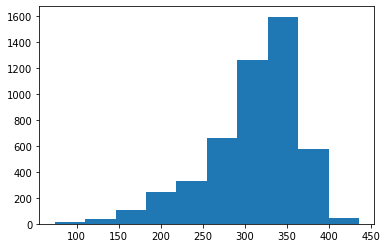

In [17]:
dists = [x.distance for x in matches12]
plt.hist(dists)

In [18]:
plt.imshow(img2)

NameError: name 'img2' is not defined

In [19]:
gray3 = cv2.imread("data/paris_general_000071.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()

kp1, desc1 = sift.detectAndCompute(gray1, None)
kp3, desc3 = sift.detectAndCompute(gray3, None)

In [20]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})
matches13 = flann.match(desc1, desc3)

In [21]:
np.mean([x.distance for x in matches13])

313.396234096159

In [22]:
matches13.sort(key=lambda x: x.distance)

In [23]:
top12 = matches12[:20]
top13 = matches13[:20]

In [24]:
top12

[<DMatch 0x11b865910>,
 <DMatch 0x11b8659b0>,
 <DMatch 0x11b857ab0>,
 <DMatch 0x11b858450>,
 <DMatch 0x11b856b10>,
 <DMatch 0x11b85af90>,
 <DMatch 0x11b865a10>,
 <DMatch 0x11b855fb0>,
 <DMatch 0x11b8656d0>,
 <DMatch 0x11b865b10>,
 <DMatch 0x11b84d650>,
 <DMatch 0x11b855e10>,
 <DMatch 0x11b855590>,
 <DMatch 0x11b856bd0>,
 <DMatch 0x11b865530>,
 <DMatch 0x11b859590>,
 <DMatch 0x11b864cd0>,
 <DMatch 0x11b855630>,
 <DMatch 0x11b852a30>,
 <DMatch 0x11b8555d0>]

Starting over

In [33]:
gray1 = cv2.imread("data/20160601_111919.jpg", cv2.IMREAD_GRAYSCALE)
gray2 = cv2.imread("data/20160601_111922.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()

kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

In [34]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})
matches12 = flann.match(desc1, desc2)

In [49]:
matches12[0].distance

125.39537811279297

In [41]:
img1_index = matches12[0].queryIdx
img2_index = matches12[0].trainIdx

In [56]:
np.linalg.norm(np.abs(desc2[img2_index] - desc1[img1_index]))

125.39538

In [71]:
dists = []

for i in range(len(matches12)):
    img1_index = matches12[i].queryIdx
    img2_index = matches12[i].trainIdx
    
    first_desc = desc1[img1_index]
    second_desc = desc2[img2_index]

    dists.append(1 - np.sum(np.abs(first_desc - second_desc) / 255) / len(first_desc))

In [72]:
np.mean(dists)

0.9470973267131451

In [61]:
np.linalg.norm(np.abs(np.array([0,0,0]) - np.array([255,255, 255])))

441.6729559300637

In [66]:
np.mean(np.abs(np.array([0,0]) - np.array([255,255])) / 255)

1.0

Try grouping entire folder based on sift feature distances

In [118]:
from app.image_io import load_images

In [119]:
names, images = load_images("data/")

In [120]:
gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

In [121]:
sift = cv2.xfeatures2d.SIFT_create()
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

def feat_similarity(desc1, desc2):
    flann = cv2.FlannBasedMatcher(index_params, {})
    matches12 = flann.match(desc1, desc2)
    
    dists = []
    
    for i in range(len(matches12)):
        image1_index = matches12[i].queryIdx
        image2_index = matches12[i].trainIdx
        
        first_desc = desc1[image1_index]
        second_desc = desc2[image2_index]
        
        dists.append(1 - np.sum(np.abs(first_desc - second_desc) / 255) / len(first_desc))
    return np.mean(dists)

In [90]:
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

In [91]:
feat_similarity(desc1, desc2)

0.947092570891849

In [122]:
descs = [sift.detectAndCompute(gray, None)[1] for gray in gray_images]

In [123]:
n = len(gray_images)
threshold = 0.8

pairs = []
similarities = []

for i in range(n):
    for j in range(i+1, n):
        similarity = feat_similarity(descs[i], descs[j])
        similarities.append(similarity)
        
        if similarity > threshold:
            pairs.append((i,j))

KeyboardInterrupt: 

In [97]:
pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (

In [98]:
len(names)

20

In [101]:
from app.visual_similarity.group_similar import group_pairs

In [102]:
group_pairs(pairs.copy())

{(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)}

In [111]:
index1 = names.index("20160601_111919.jpg")
index2 = names.index("20160601_111922.jpg")

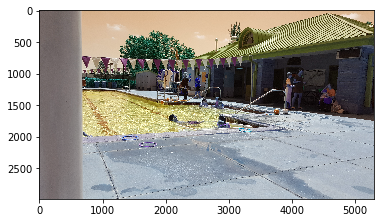

In [113]:
plt.imshow(images[index1])

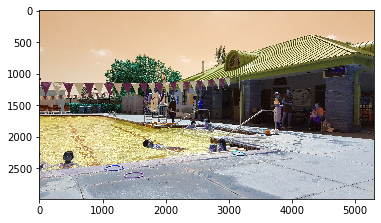

In [114]:
plt.imshow(images[index2])

In [115]:
desc1 = descs[index1]
desc2 = descs[index2]

In [116]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})

In [129]:
matches = flann.knnMatch(desc1, desc1, k=2)

In [135]:
desc1

array([[  3.,   2.,   4., ...,   0.,   0.,   6.],
       [  2., 134., 106., ...,   0.,   0.,   0.],
       [ 27.,   3.,   5., ...,   2.,   0.,   0.],
       ...,
       [  3.,   0.,   0., ...,  10.,   6.,   4.],
       [ 14.,   7.,   3., ...,   0.,   0.,   0.],
       [  8.,  16.,  32., ...,   0.,   0.,   0.]], dtype=float32)

In [133]:
descs[0]

array([[47., 71., 94., ..., 50.,  9., 28.],
       [ 1.,  9., 30., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8., 58., 33.],
       ...,
       [ 4., 28., 81., ...,  0.,  0.,  3.],
       [18., 96., 84., ...,  4., 22., 65.],
       [41., 24.,  2., ...,  0.,  0.,  0.]], dtype=float32)

In [140]:
stuff = []

# Lowe's ratio test
for i in range(len(descs)):
    for j in range(i+1, len(descs)):
        flann = cv2.FlannBasedMatcher(index_params, None)
        matches = flann.knnMatch(descs[i], descs[j], k=2)
        ratio_thresh = 0.7
        good_matches = 0

        for k in range(len(matches)):
            if matches[k][0].distance < ratio_thresh * matches[k][1].distance:
                good_matches += 1
        
        percent = good_matches / len(matches)
        stuff.append((i, j, percent))
        print(i, j, percent)

0 1 0.013440860215053764
0 2 0.008064516129032258
0 3 0.026881720430107527
0 4 0.013440860215053764
0 5 0.005376344086021506
0 6 0.008064516129032258
0 7 0.002688172043010753
0 8 0.013440860215053764
0 9 0.0
0 10 0.008064516129032258
0 11 0.002688172043010753
0 12 0.013440860215053764
0 13 0.008064516129032258
0 14 0.002688172043010753
0 15 0.002688172043010753
0 16 0.008064516129032258
0 17 0.0
0 18 0.005376344086021506
0 19 0.026881720430107527
1 2 0.006548788474132285
1 3 0.007203667321545514
1 4 0.005020737830168085
1 5 0.005239030779305829
1 6 0.006330495524994543
1 7 0.004147566033617114
1 8 0.0034926871862038856
1 9 0.006767081423270029
1 10 0.0034926871862038856
1 11 0.0030561012879283997
1 12 0.005239030779305829
1 13 0.004147566033617114
1 14 0.004147566033617114
1 15 0.004365858982754857
1 16 0.0037109801353416285
1 17 0.005893909626719057
1 18 0.0034926871862038856
1 19 0.0056756166775813145
2 3 0.012195121951219513
2 4 0.0040650406504065045
2 5 0.0013550135501355014
2 6 0.

In [144]:
stuff_arr = np.array(stuff)
np.mean(stuff_arr[:,2])

0.007194408704400556

In [147]:
[a for a in stuff_arr[:,2] if a > 0.1]

[0.10197535693330725]

In [127]:
good_matches = 0

for first, second in matches:
    if first.distance < second.distance * ratio_thresh:
        good_matches += 1

In [124]:
good_matches

7775

In [125]:
len(matches)

76695

In [122]:
good_matches/len(matches)

0.10137557859052089

## YOLO Object Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv2.__version__

'3.4.2'

In [67]:
labels = []
with open("app/object_similarity/data/coco.names") as f:
    lines = f.readlines()
    labels = [line.strip() for line in lines]

In [69]:
from app.image_io import load_images

In [70]:
names, images = load_images("data/")

In [112]:
configPath = "app/object_similarity/data/yolov3.cfg"
weightsPath = "app/object_similarity/data/yolov3.weights"

net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

image_objects = []
image_confidences = []

for image in images:
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    net_output = net.forward(ln)
    
    confidences = []
    class_ids = []
    
    for output in net_output:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    image_objects.append(class_ids)
    image_confidences.append(confidences)

In [117]:
from app.object_similarity.object_detection import classify_dir
res = classify_dir("data")
res

defaultdict(<function app.object_similarity.object_detection.group_labels.<locals>.<lambda>()>,
            {'car': ['Car2.jpg', 'Car1.jpg', 'paris_general_000016.jpg'],
             'truck': ['Car2.jpg'],
             'person': ['paris_general_000001.jpg',
              'paris_general_000003.jpg',
              'paris_general_000002.jpg',
              'paris_general_000012.jpg',
              '20160601_111919.jpg',
              '20160601_111922.jpg',
              '20160706_111435.jpg',
              '20160706_111437.jpg',
              'paris_general_000087.jpg',
              '20160706_111431.jpg',
              'paris_general_000021.jpg',
              'paris_general_000008.jpg'],
             'chair': ['paris_general_000003.jpg'],
             'tie': ['paris_general_000012.jpg'],
             'none detected': ['paris_general_000071.jpg',
              'paris_general_000009.jpg',
              'paris_general_000023.jpg'],
             'handbag': ['paris_general_000087.jpg'],
    

In [116]:
from collections import defaultdict

d = defaultdict(lambda: [])
d['a'].append(1)
d

defaultdict(<function __main__.<lambda>()>, {'a': [1]})

In [113]:
all_confidences = []

for confidence_ls in image_confidences:
    for conf in confidence_ls:
        all_confidences.append(conf)

In [114]:
labeled_stuff = [[labels[i] for i in list(set(thing))] for thing in image_objects]

In [115]:
labeled_stuff

[['car', 'truck'],
 ['person'],
 ['car'],
 ['person', 'chair'],
 ['car'],
 ['person'],
 ['person', 'tie'],
 ['person'],
 ['person'],
 [],
 ['person'],
 ['person'],
 ['person', 'handbag'],
 ['refrigerator', 'book'],
 ['person', 'backpack'],
 ['book'],
 [],
 ['person'],
 ['person'],
 []]

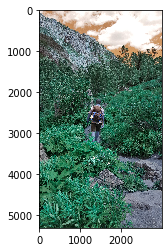

In [91]:
plt.imshow(images[14])

In [90]:
labeled_stuff[14]

['person', 'giraffe']

In [56]:
confidence_thresh = 0.2

# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores.flat[classID]
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > confidence_thresh:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [58]:
set(classIDs)

{0, 73}

In [65]:
labels[0]

'person'

More SIFT stuff

In [132]:
gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
sift = cv2.xfeatures2d.SIFT_create()

In [134]:
descs = [sift.detectAndCompute(gray, None)[1] for gray in gray_images]

In [147]:
np.ones([3,3]) * np.inf

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [148]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})

In [149]:
match = flann.match(descs[0], descs[1])

In [151]:
np.mean([m.distance for m in match])

294.42568196532545

In [175]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

flann = cv2.FlannBasedMatcher(index_params, {})

n = len(gray_images)
dist_matrix = np.ones([n,n]) * np.inf

for i in range(n):
    for j in range(i+1, n):
        match = flann.match(descs[i], descs[j])
        mean_dist = np.mean([m.distance for m in match])

        dist_matrix[i,j] = mean_dist
        dist_matrix[j,i] = mean_dist
        print(i,j)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
12 13
12 14
12 15
12 16
12 17
12 18
12 19
13 14
13 15
13 16
13 17
13 18
13 19
14 15
14 16
14 17
14 18
14 19
15 16
15 17
15 18
15 19
16 17
16 18
16 19
17 18
17 19
18 19


In [176]:
pairs = []

for i in range(n):
    j = np.argmin(dist_matrix[i,:])
    pairs.append((i,j))

In [177]:
pairs

[(0, 11),
 (1, 14),
 (2, 14),
 (3, 14),
 (4, 14),
 (5, 13),
 (6, 14),
 (7, 8),
 (8, 7),
 (9, 14),
 (10, 3),
 (11, 3),
 (12, 3),
 (13, 3),
 (14, 3),
 (15, 16),
 (16, 15),
 (17, 15),
 (18, 15),
 (19, 15)]

In [179]:
from app.visual_similarity.group_similar import group_pairs

group = group_pairs(pairs)

In [180]:
group

{(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14), (8, 7), (15, 16, 17, 18, 19)}

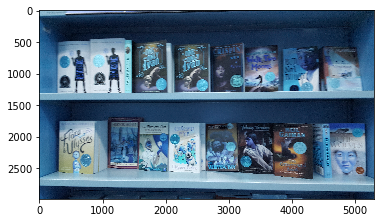

In [183]:
plt.imshow(images[15])

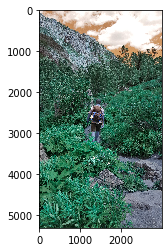

In [188]:
plt.imshow(images[14])